<a href="https://colab.research.google.com/github/ke-wen/ke-wen/blob/main/Copy_of_Forecastingnonseasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proposal Brief      

Grace, Jack and I have decided to choose Household total disposable Income as our non-seasonal data. The reason we chose to do our nonseasonal data on total disposable income is because Covid-19 had such a dramatic effect on people's financial situation. Due to the pandemic, many people lost their jobs or had their income reduced, which resulted in having a big impact on the disposable income for each household. And the factors that affect the total disposable income are usually non-seasonal, so we have taken the total disposable income as our non-seasonal time series forecasting target.  The source of our data came from the CSO website.

Source

https://data.cso.ie/

First you need to do:   
Upload file Household total disposable Income.xlsx  
Create folder figures


# **Nonseasonal**

In this project, I used four time series models, ARIMA, naive seasonal, last year mean and  historical mean to identify, estimate, validate, and generate forecasts for the household total disposable income, a non-seasonal time series dataset. I then used the mean absolute percentage error (MAPE) to compare the accuracy of the four models and determine which one best fits the original time series data.The end result is that the MAPE of the ARIMA model is relatively low, so we use the ARIMA model

1. Import the required libs

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union
import numpy as np
import pandas as pd
import matplotlib.dates as mdates



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

2. Data loading in a dataframe

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ke-wen/ke-wen/main/dataset/Household%20total%20disposable%20Income.csv')
df.head()

,Statistic Label,TIME,Country,UNIT,Value
0,Household total disposable Income,1999Q1,Ireland,Euro Million,11868.98
1,Household total disposable Income,1999Q2,Ireland,Euro Million,10623.73
2,Household total disposable Income,1999Q3,Ireland,Euro Million,12655.65
3,Household total disposable Income,1999Q4,Ireland,Euro Million,12161.58
4,Household total disposable Income,2000Q1,Ireland,Euro Million,12556.97


In [ ]:
df.tail()

,Statistic Label,TIME,Country,UNIT,Value
91,Household total disposable Income,2021Q4,Ireland,Euro Million,32538.01
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93


3. Ploting the time series

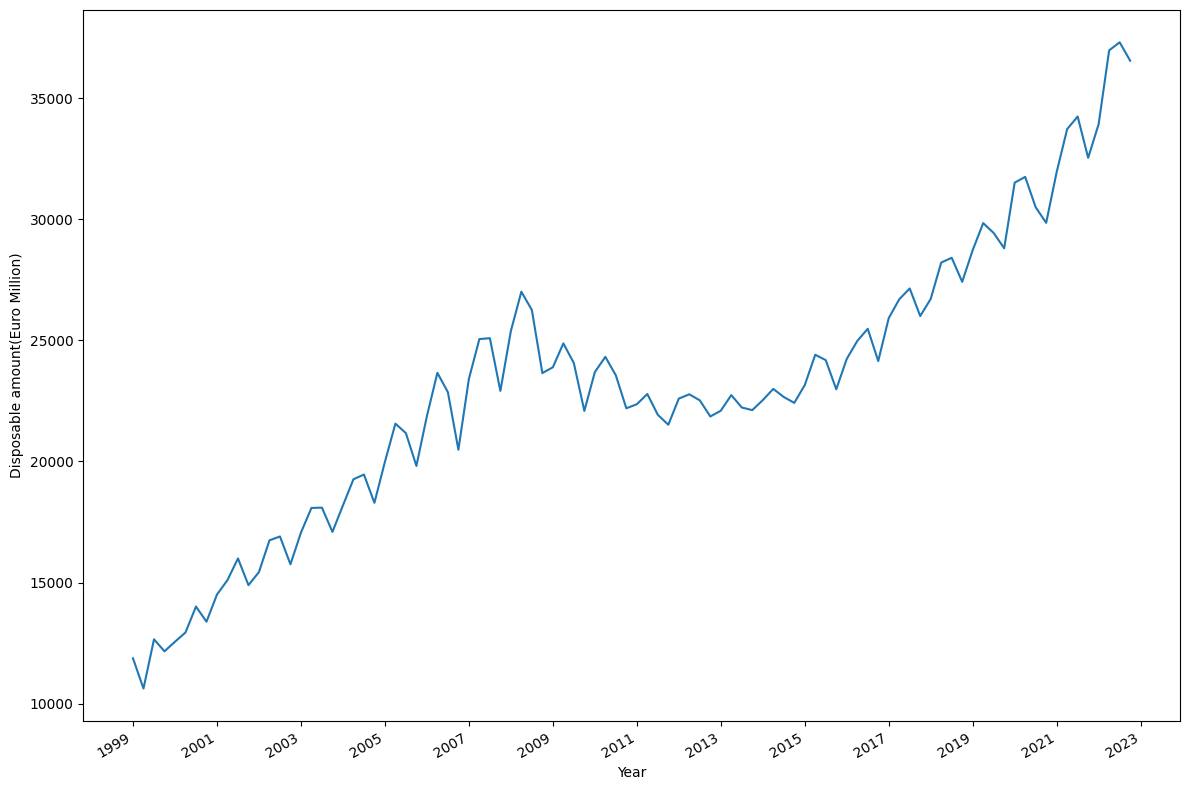

In [ ]:
# Plotting data with train/test split
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting date on x-axis and data on y-axis
ax.plot(df['TIME'],df['Value'])


# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Disposable amount(Euro Million)')

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

# Formatting x-axis labels
fig.autofmt_xdate()

# Adjusting layout
plt.tight_layout()

# Saving the plot to a file
plt.savefig('figures/ca_nonseasonal2_peixeiro.png', dpi=300)

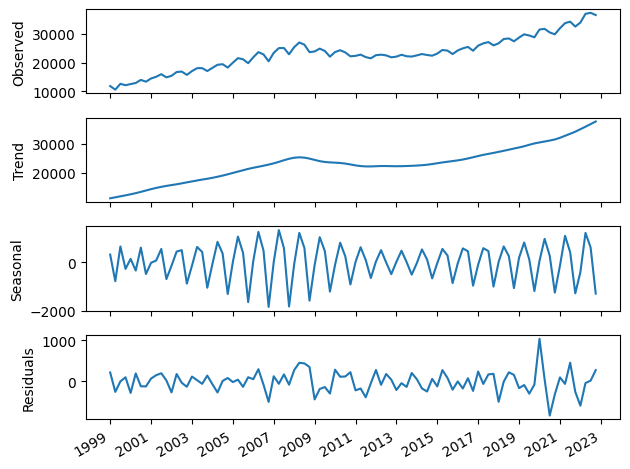

In [ ]:
advanced_decomposition = STL(df['Value'], period=4).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_nonseasonal1_peixeiro.png', dpi=300)

Test whether the time series is nonstationary

In [ ]:
home_ADF_result = adfuller(df['Value'])

print(f'ADF Statistic: {home_ADF_result[0]}')
print(f'p-value: {home_ADF_result[1]}')

ADF Statistic: 0.4466357894450544
p-value: 0.9831576335938321


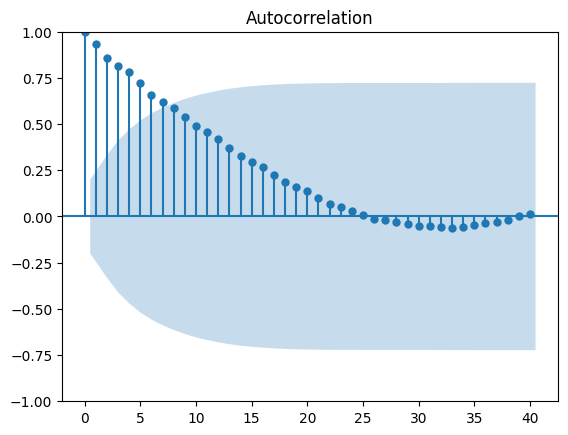

In [ ]:
plot_acf(df['Value'], lags=40);

plt.savefig('figures/CH03_F13_home_ACF.png', dpi=300)

This time series is Random Walk. so this time series is nonstationary

Test for stationarity determines the order of differencing

In [ ]:
ad_fuller_result = adfuller(df['Value'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.4466357894450544
p-value: 0.9831576335938321


In [ ]:
eps_diff = np.diff(df['Value'], n=1)

ad_fuller_result = adfuller(eps_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.479530254790446
p-value: 0.1205346031115424


In [ ]:
eps_diff2 = np.diff(eps_diff, n=1)

ad_fuller_result = adfuller(eps_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -29.2432971422125
p-value: 0.0


choose second difference

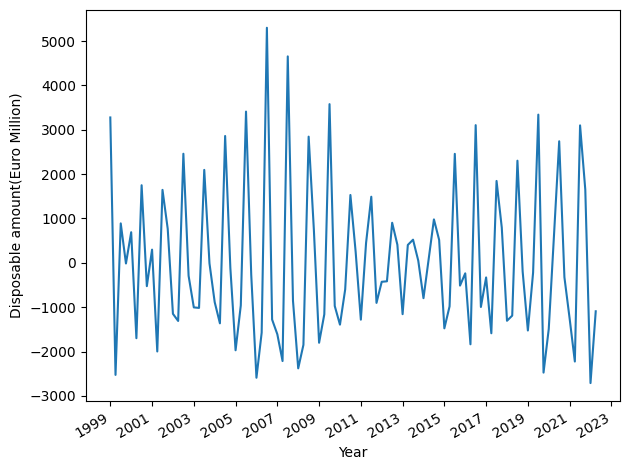

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['TIME'][2:], eps_diff2)

ax.set_xlabel('Year')

ax.set_ylabel('Disposable amount(Euro Million)')

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

fig.autofmt_xdate()
plt.tight_layout()

# plt.savefig('figures/CH07_F01_peixeiro.png', dpi=300)

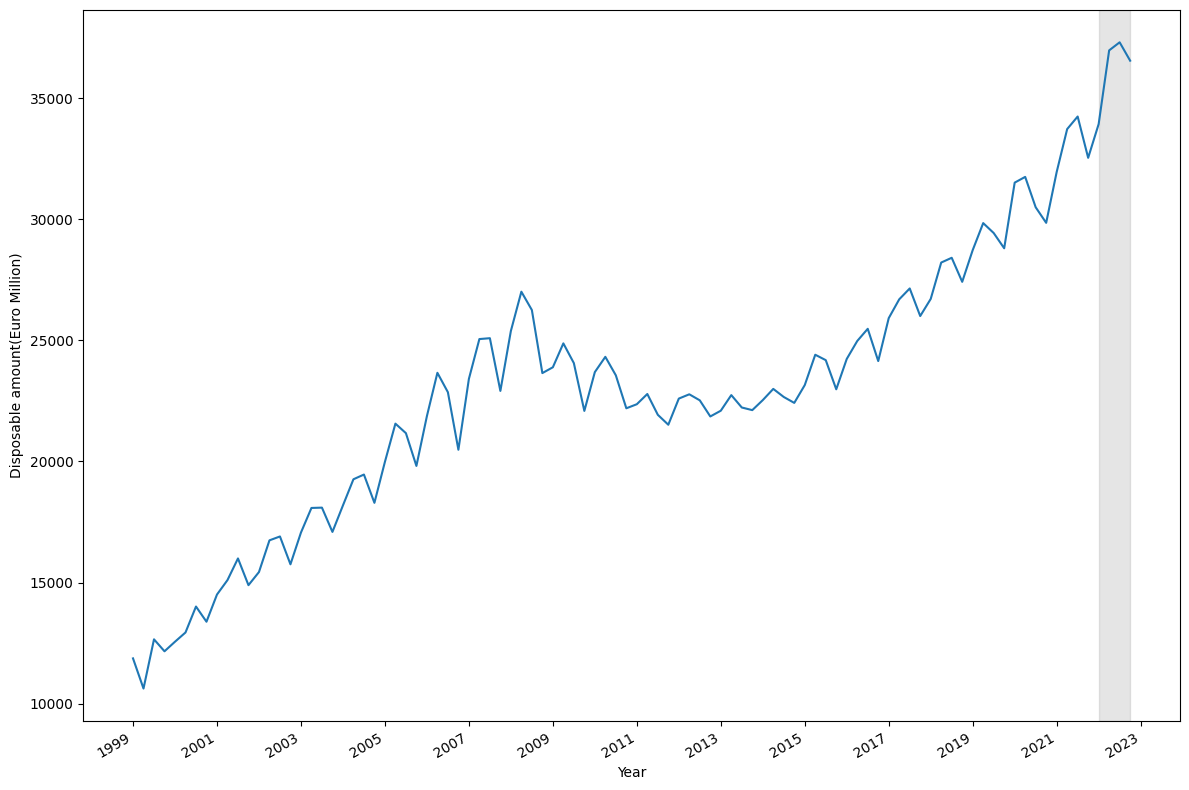

In [ ]:
# Plotting data with train/test split
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting date on x-axis and data on y-axis
ax.plot(df['TIME'],df['Value'])


# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Disposable amount(Euro Million)')

ax.axvspan(92, 95, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))

# Formatting x-axis labels
fig.autofmt_xdate()

# Adjusting layout
plt.tight_layout()

# Saving the plot to a file
plt.savefig('figures/ca_nonseasonal2_peixeiro.png', dpi=300)

Run the ARIMA function

In [ ]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

order_list = list(product(ps, qs))

In [ ]:
train = df['Value'][:-4]

result_df = optimize_ARIMA(np.log(train), order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(3, 2)",-352.510845,-337.511987
1,"(3, 1)",-351.865952,-339.366903
2,"(3, 3)",-349.360400,-331.861732
3,"(3, 0)",-348.907777,-338.908538
4,"(2, 3)",-322.034168,-307.035310
5,"(2, 2)",-305.920135,-293.421086
6,"(2, 1)",-286.773027,-276.773788
7,"(0, 3)",-283.526530,-273.527291
8,"(0, 2)",-281.481790,-273.982361
9,"(1, 2)",-259.407679,-249.408440


**Apply model** 

p = 3, q =2 , d=2

In [ ]:
model = SARIMAX(train, order=(3,2,2), simple_differencing=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   92
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -728.927
Date:                Mon, 10 Apr 2023   AIC                           1469.854
Time:                        13:57:39   BIC                           1484.853
Sample:                             0   HQIC                          1475.902
                                 - 92                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8635      0.061    -14.192      0.000      -0.983      -0.744
ar.L2         -0.7866      0.043    -18.313      0.000      -0.871      -0.702
ar.L3         -0.7233      0.034    -21.462      0.0

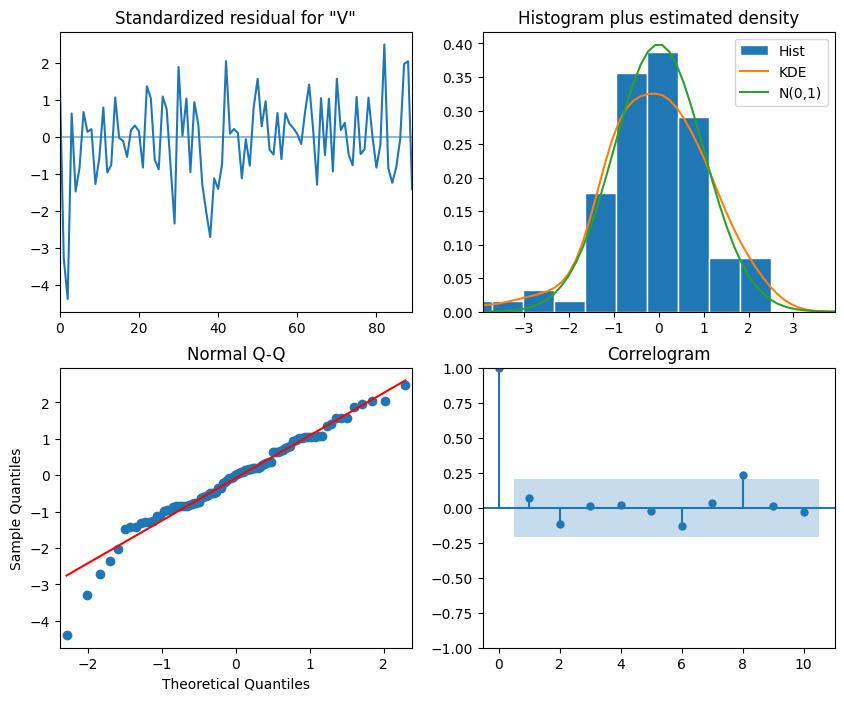

In [ ]:
model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH07_F07_peixeiro.png', dpi=300)

historical mean

In [ ]:
historical_mean = np.mean(df['Value'])
historical_mean

23080.749166666665

In [ ]:
test = df.iloc[-4:]

test['historical_mean'] = historical_mean
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167


last year mean

In [ ]:
train = df['Value'][:-4]
last_year_mean = np.mean(train)
last_year_mean

22510.756630434782

In [ ]:
test['last_year_mean'] = last_year_mean
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean,last_year_mean
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167,22510.75663
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167,22510.75663
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167,22510.75663
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167,22510.75663


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))


,lb_stat,lb_pvalue
1,14.116973,0.000172
2,15.803864,0.000370
3,15.809436,0.001241
4,18.963542,0.000799
5,19.123188,0.001823
6,19.402472,0.003535
7,19.481270,0.006806
8,19.938123,0.010573
9,19.938167,0.018298
10,20.001545,0.029238


In [ ]:
test['naive_seasonal'] = df['Value'].iloc[88:92].values
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean,last_year_mean,naive_seasonal
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167,22510.75663,31950.73
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167,22510.75663,33724.64
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167,22510.75663,34243.51
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167,22510.75663,32538.01


In [ ]:
ARIMA_pred = model_fit.get_prediction(92, 95).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Statistic Label,TIME,Country,UNIT,Value,historical_mean,last_year_mean,naive_seasonal,ARIMA_pred
92,Household total disposable Income,2022Q1,Ireland,Euro Million,33931.15,23080.749167,22510.75663,31950.73,33794.344141
93,Household total disposable Income,2022Q2,Ireland,Euro Million,36974.56,23080.749167,22510.75663,33724.64,35415.788116
94,Household total disposable Income,2022Q3,Ireland,Euro Million,37307.67,23080.749167,22510.75663,34243.51,36001.045921
95,Household total disposable Income,2022Q4,Ireland,Euro Million,36548.93,23080.749167,22510.75663,32538.01,35051.661624


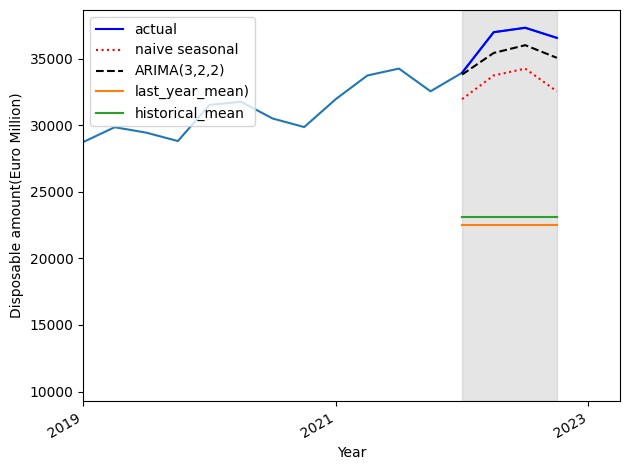

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['TIME'], df['Value'])
ax.plot(test['Value'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(3,2,2)')
ax.plot(test['last_year_mean'], label='last_year_mean)')
ax.plot(test['historical_mean'], label='historical_mean')




ax.set_xlabel('Year')
ax.set_ylabel('Disposable amount(Euro Million)')
ax.axvspan(92, 95, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0, 97, 8), np.arange(1999,2024,2))
ax.set_xlim(80, 97)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH07_F08_peixeiro.png', dpi=300)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_naive_seasonal = mape(test['Value'], test['naive_seasonal'])*100
mape_ARIMA = mape(test['Value'], test['ARIMA_pred'])*100
mape_last_year_mean = mape(test['Value'], test['last_year_mean'])*100
mape_historical_mean = mape(test['Value'], test['historical_mean'])*100

print('MAPE Naive:',"%.2f" % (mape_naive_seasonal),'%')
print('MAPE ARIMA:',"%.2f" % (mape_ARIMA),'%')
print('MAPE last year mean:',"%.2f" % (mape_last_year_mean),'%')
print('MAPE historical mean:',"%.2f" % (mape_historical_mean),'%')

MAPE Naive: 8.45 %
MAPE ARIMA: 3.05 %
MAPE last year mean: 37.71 %
MAPE historical mean: 36.13 %


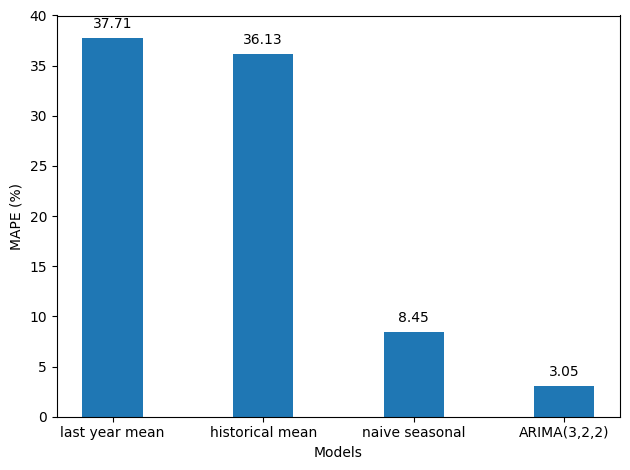

In [ ]:
fig, ax = plt.subplots()

x = ['last year mean','historical mean','naive seasonal', 'ARIMA(3,2,2)']
y = [mape_last_year_mean, mape_historical_mean, mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 40)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH07_F09_peixeiro.png', dpi=300)

**conclusion：**

The Arima model using the second order difference is closer to the data of household disposable income, so we choose the Arima model